In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualizing the data

In [73]:
FILE_NAME = "PQ2MON - Orders - Weeks -1 to -109 (1).xls.xlsx"
DF = pd.read_excel(FILE_NAME)
DF

,Client Grouping1,Customer Group,Requested Mode,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Lane ID - City to City,Start Date,Completion Date,Order #,Avg. Weekly Frequency
0,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-04-16,2019-04-18,3790088,0
1,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-05-07,2019-05-09,3810953,0
2,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-06-07,2019-06-10,3841144,0
3,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-07-09,2019-07-11,3869973,0
4,Corporate,3M Canada Company,ROAD,Standard,DRY,PQ2MON,USMWIA,"STE THERESE,PQ/TE to PRAIRIE DU CHIEN,WI/",2020-02-26,2020-03-02,4066936,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23864,Spot,Traffic Tech,ROAD,Standard,DRY,PQ2MON,BC2VAN,"ST LAURENT,PQ/IL to DELTA,BC/",2020-06-18,2020-06-22,4192727,0
23865,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-18,4074001,0
23866,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-20,4073978,0
23867,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-13,2020-02-18,4074019,0


In [148]:
from collections import Counter

def getSortedCounter(my_list,cut_off=5,desc=True,others=True):
    c = dict(sorted(Counter(my_list).items(), key=lambda x: x[1], reverse = desc))
    if cut_off and cut_off < len(c):
        others_cnt = sum(list(c.values())[cut_off:])
        c = dict(list(c.items())[:cut_off])
        if others:
            c["Others"] = others_cnt
    return c

def getSortedCounterDf(df,col,cut_off=5):
    c = getSortedCounter(df[col],cut_off=cut_off)
    df = pd.DataFrame(columns=[col,"count"])
    df[col] = [str(key) for key in c.keys()]
    df["count"] = c.values()
    return df

def sorted_bar_plot(df,col,cut_off=5):
    df_cnt = getSortedCounterDf(df,col,cut_off)
    sns.barplot(data=df_cnt,y=col,x="count")
    plt.show()


def pie_plot(my_list):
    c = getCounter(my_list,desc=True)
    labels = c.keys()
    sizes = [i/len(my_list) for i in c.values()]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,counterclock = False)
    ax1.axis('equal')
    plt.show()
    

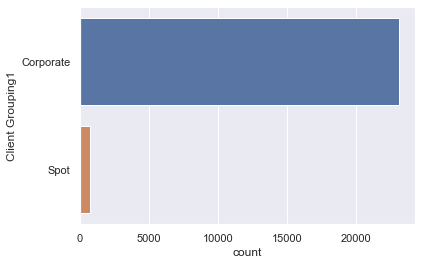

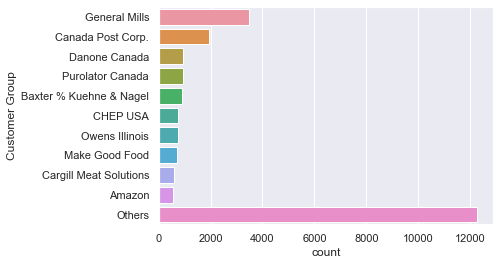

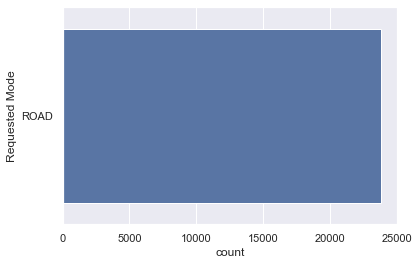

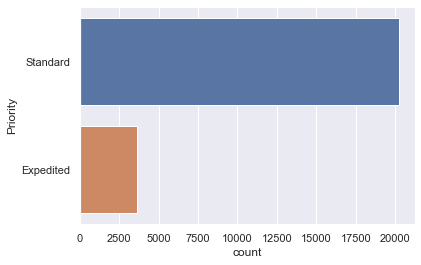

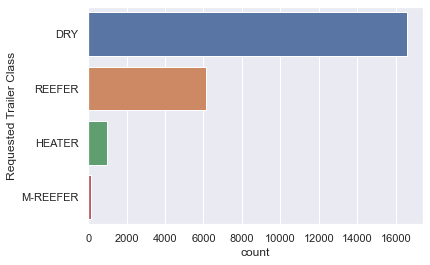

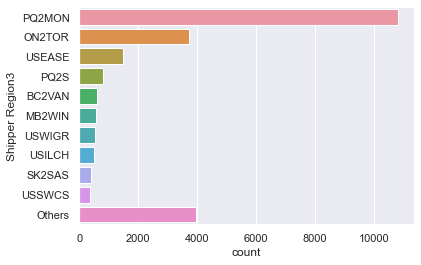

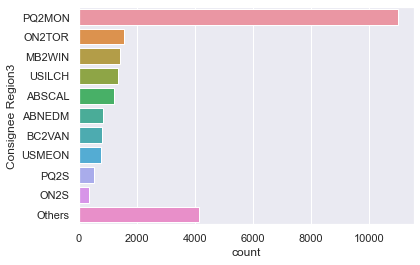

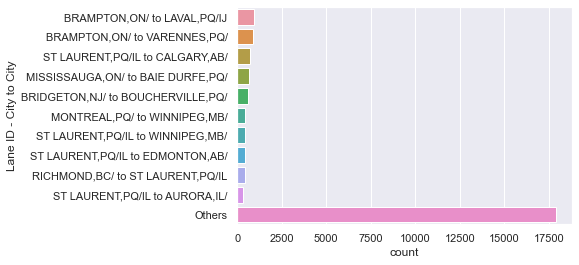

In [149]:
for col in DF.columns[:-4]:
    sorted_bar_plot(DF,col,10)

<AxesSubplot:xlabel='Count', ylabel='Start Date'>

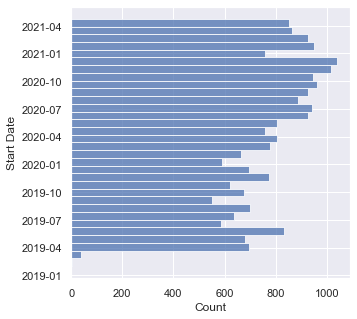

In [143]:
col = DF.columns[-4]
plt.figure(figsize=(5,5))
sns.histplot(data=DF,y=col)

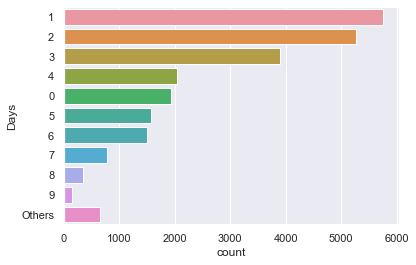

In [142]:
df = DF['Completion Date'] - DF['Start Date']
df = pd.DataFrame([item.days for item in df],columns=["Days"])
bar_plot(df,"Days",10)